In [1]:
import time
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('Japan earthquakes 2001 - 2018.csv')

In [45]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us


In [46]:
df.shape

(14092, 22)

In [47]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [48]:
df.isna().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 3609
gap                  782
dmin               10485
rms                   78
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    11292
depthError          5052
magError           10661
magNst              3044
status                 0
locationSource         0
magSource              0
dtype: int64

Drop the duplicated entries.

In [49]:
df.drop_duplicates(['latitude','longitude','id'], keep='first')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,2001-01-04T04:18:21.430Z,36.9810,138.6290,21.40,5.3,mwc,240.0,NaN,NaN,0.78,...,2016-11-09T21:35:38.927Z,"eastern Honshu, Japan",earthquake,NaN,5.4,NaN,NaN,reviewed,us,hrv
14088,2001-01-03T14:47:49.540Z,43.9320,147.8130,33.00,5.9,mwc,362.0,NaN,NaN,0.82,...,2016-11-09T04:09:27.754Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
14089,2001-01-03T09:32:54.710Z,45.3010,149.9410,33.00,4.6,mb,40.0,NaN,NaN,0.82,...,2014-11-07T01:11:51.270Z,Kuril Islands,earthquake,NaN,NaN,NaN,20.0,reviewed,us,us
14090,2001-01-02T20:29:49.670Z,32.2390,141.5080,33.00,4.9,mb,32.0,NaN,NaN,0.96,...,2014-11-07T01:11:51.119Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,23.0,reviewed,us,us


In [50]:
df.rename(columns={'mag':'magnitude',
                   'nst':'seismic_stations',
                   'magType':'magnitude_type',
                   'rms':'seismic_wave_residual'},
          inplace=True)

seismic_stations represents total number of seismic stations used to determine the earthquake location. So there must be atleast one station.

In [61]:
df.seismic_stations.fillna(1,inplace=True)
df.gap.fillna(df.gap.mean(),inplace=True)
df.fillna(0,inplace=True)

We'll drop dmin since more than 50% data is missing.

In [66]:
df.drop(columns='dmin',inplace=True)

In [52]:
df.groupby('type').size()

type
earthquake           14087
nuclear explosion        5
dtype: int64

We want to examine only earthquake.

In [53]:
df = df[~df.type.isin(['nuclear explosion'])]

In [54]:
df.shape

(14087, 22)

Extract month, week, day of month, year from the date.

In [55]:
#conver the data type of time column to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract the month name, day of the week name, day of the month, and year from the "time" column
df["month"] = df["time"].dt.strftime("%B")
df["week"] = df["time"].dt.strftime("%A")
df["day_of_month"] = df["time"].dt.day
df["year"] = df["time"].dt.year

This block creates a value so specific part of day is mapped based on time of the day.

In [56]:
# Create a function to categorize part of the day
def part_of_day(hour_val):
    if 2 <= hour_val < 6:
        return "early morning (2am-6am)"
    elif 6 <= hour_val < 12:
        return "morning (6am-12pm)"
    elif 12 <= hour_val < 17:
        return "afternoon (12pm-5pm)"
    elif 17 <= hour_val < 23:
        return "evening (5pm-11pm)"
    else:
        return "night (12am-2am)"

# Apply the function to create the "part_of_day" column
df["part_of_day"] = df["time"].dt.hour.apply(part_of_day)

#sort values by time in ascending order
df.sort_values(by='time',inplace=True)

#set the time column as the index
df.set_index('time',inplace=True)

In [67]:
df.head()

,latitude,longitude,depth,magnitude,magnitude_type,seismic_stations,gap,seismic_wave_residual,net,id,...,magError,magNst,status,locationSource,magSource,month,week,day_of_month,year,part_of_day
time,,,,,,,,,,,,,,,,,,,,,
2001-01-02 10:53:23.280000+00:00,37.218,138.431,33.0,4.9,mb,43.0,104.29513,0.93,us,usp000a72e,...,0.0,15.0,reviewed,us,us,January,Tuesday,2,2001,morning (6am-12pm)
2001-01-02 20:29:49.670000+00:00,32.239,141.508,33.0,4.9,mb,32.0,104.29513,0.96,us,usp000a72u,...,0.0,23.0,reviewed,us,us,January,Tuesday,2,2001,evening (5pm-11pm)
2001-01-03 09:32:54.710000+00:00,45.301,149.941,33.0,4.6,mb,40.0,104.29513,0.82,us,usp000a73h,...,0.0,20.0,reviewed,us,us,January,Wednesday,3,2001,morning (6am-12pm)
2001-01-03 14:47:49.540000+00:00,43.932,147.813,33.0,5.9,mwc,362.0,104.29513,0.82,us,usp000a73r,...,0.0,0.0,reviewed,us,hrv,January,Wednesday,3,2001,afternoon (12pm-5pm)
2001-01-04 04:18:21.430000+00:00,36.981,138.629,21.4,5.3,mwc,240.0,104.29513,0.78,us,usp000a74c,...,0.0,0.0,reviewed,us,hrv,January,Thursday,4,2001,early morning (2am-6am)


**Dataset looks clean, let's save it for later use.**

In [69]:
df.to_csv('cleandata.csv')

**Let us look at the correlation matrix to understand the relation between features.**

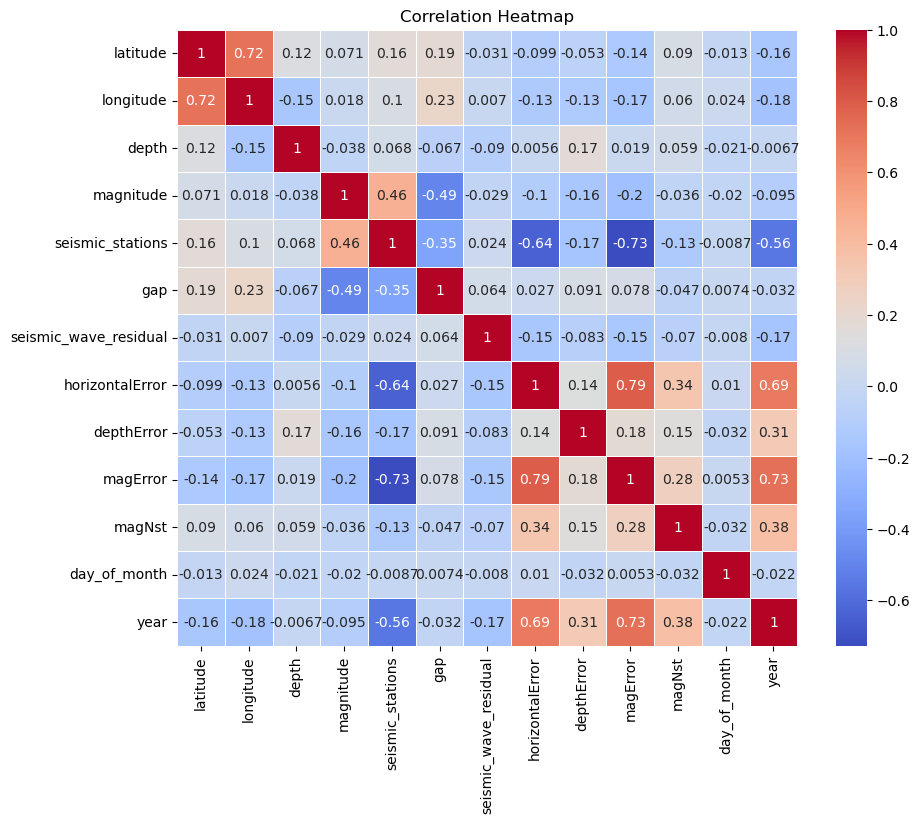

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5,  annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

**Total occurrences per magnitude.**

In [13]:
mag_total = df.groupby('magnitude').agg(total=('magnitude','size')).reset_index()

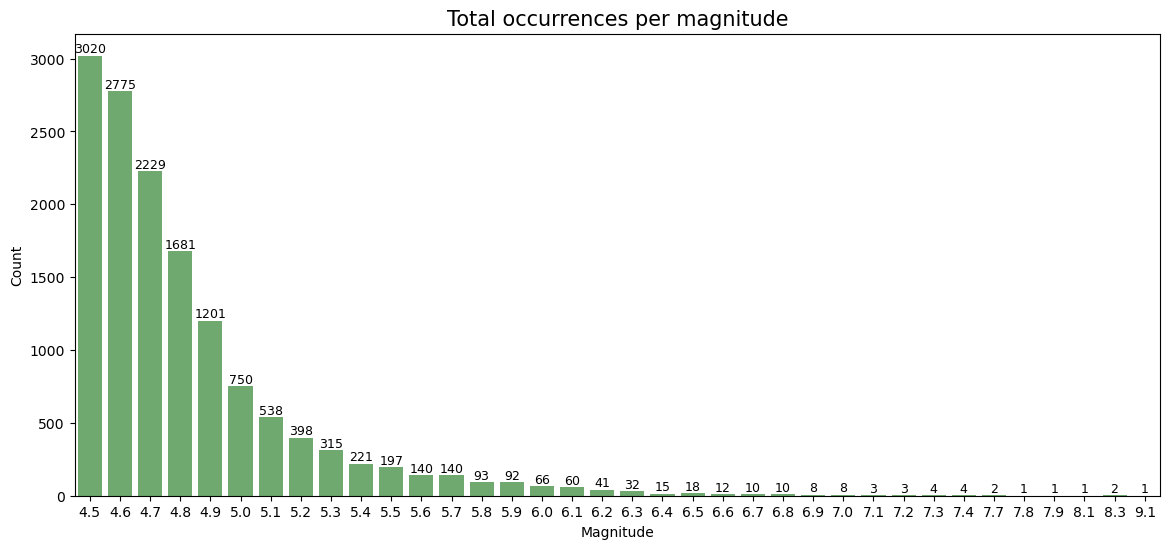

In [14]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=mag_total.magnitude, y=mag_total.total, data = mag_total, color="green", alpha=0.6)

ax.set(xlabel="Magnitude", ylabel='Count')
ax.set_title('Total occurrences per magnitude', fontsize=15)
# ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')

for i, v in enumerate(mag_total.sort_values('magnitude')['total']):
    ax.text(i, v + 20, str(v), ha='center', fontsize=9)

**Total occurrences per year.**

In [15]:
year_df = df.groupby('year').agg(total=('year','count')).reset_index()

609.5


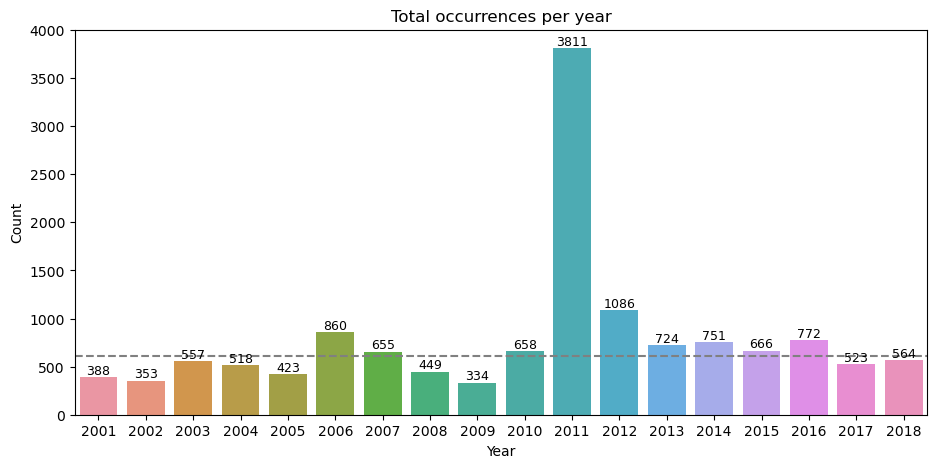

In [16]:
median = np.median(year_df.total)
print(median)

plt.figure(figsize=(11,5))
ax = sns.barplot(data=year_df, x="year", y="total")

ax.set(xlabel="Year", ylabel='Count',title='Total occurrences per year')
ax.axhline(y=median, color='gray', linestyle='--')

for i, v in enumerate(year_df.sort_values('year')['total']):
    ax.text(i, v + 30, str(v), ha='center', fontsize=9)

The dotted horizontal bar represents median which is 609.5.

**Total occurrences per month.**

In [17]:
month_df = df.groupby('month').agg(total=('month','count')).reset_index()

994.0


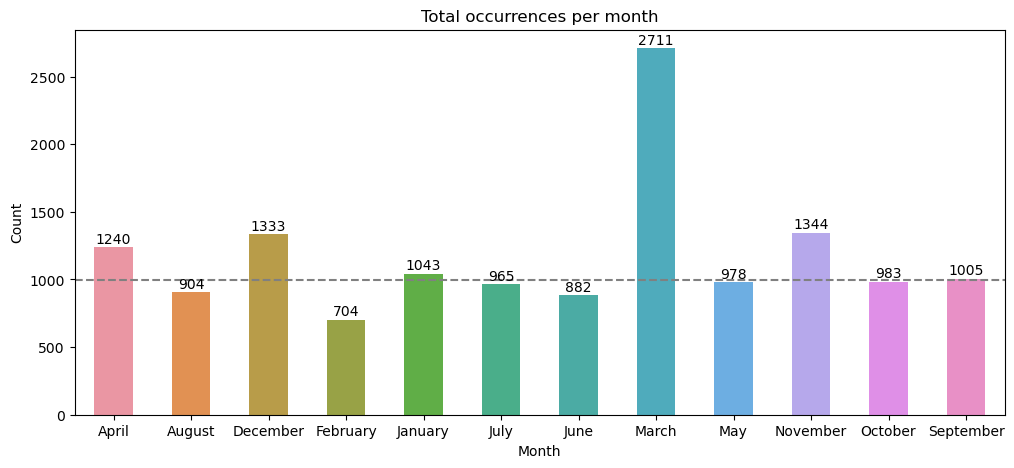

In [18]:
median = np.median(month_df.total)
print(median)

plt.figure(figsize=(12,5))
ax = sns.barplot(data=month_df, x="month", y="total", width=0.5)

ax.set(xlabel="Month", ylabel='Count',title='Total occurrences per month')
ax.axhline(y=median, color='gray', linestyle='--')

for i, v in enumerate(month_df['total']):
    ax.text(i, v + 30, str(v), ha='center', fontsize=10)

**Total occurrences per week.**

In [19]:
week_df = df.groupby('week').agg(total=('week','count')).reset_index()

2014.0


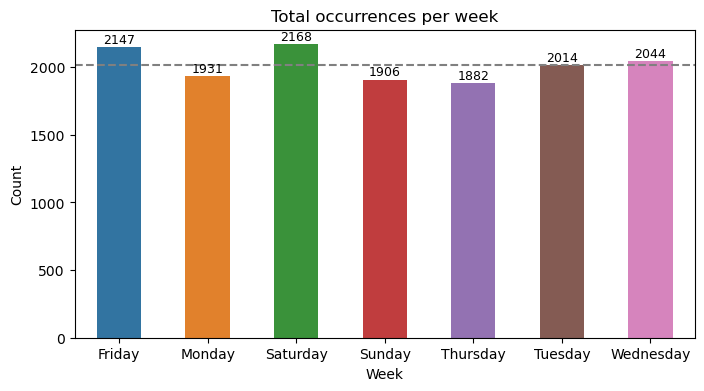

In [20]:
median = np.median(week_df.total)
print(median)

plt.figure(figsize=(8,4))
ax = sns.barplot(data=week_df, x="week", y="total", width=0.5)

ax.set(xlabel="Week", ylabel='Count',title='Total occurrences per week')
ax.axhline(y=median, color='gray', linestyle='--')

for i, v in enumerate(week_df['total']):
    ax.text(i, v + 30, str(v), ha='center', fontsize=9)

**Total occurrences per part part of day.**

In [21]:
pod_df = df.groupby('part_of_day').agg(total=('part_of_day','count')).reset_index()
pod_df

,part_of_day,total
0,afternoon (12pm-5pm),3049
1,early morning (2am-6am),2092
2,evening (5pm-11pm),3711
3,morning (6am-12pm),3591
4,night (12am-2am),1649


3049.0


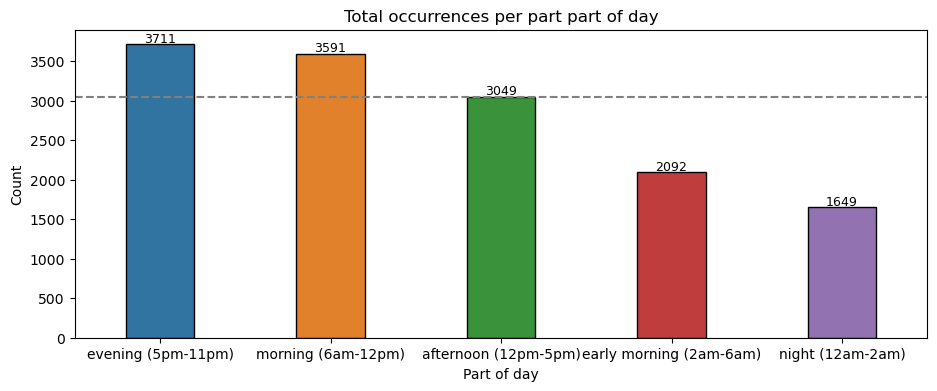

In [37]:
median = np.median(pod_df.total)
print(median)

plt.figure(figsize=(11,4))
ax = sns.barplot(data=pod_df, x="part_of_day", y="total", order=pod_df.sort_values('total',ascending=False).part_of_day, width=0.4, edgecolor='black')

ax.set(xlabel="Part of day", ylabel='Count',title='Total occurrences per part part of day')
ax.axhline(y=median, color='gray', linestyle='--')

for i, v in enumerate(pod_df.sort_values('total',ascending=False)['total']):
    ax.text(i, v + 30, str(v), ha='center', fontsize=9)

**Histogram to analyze the depth.**

<Axes: xlabel='depth', ylabel='Count'>

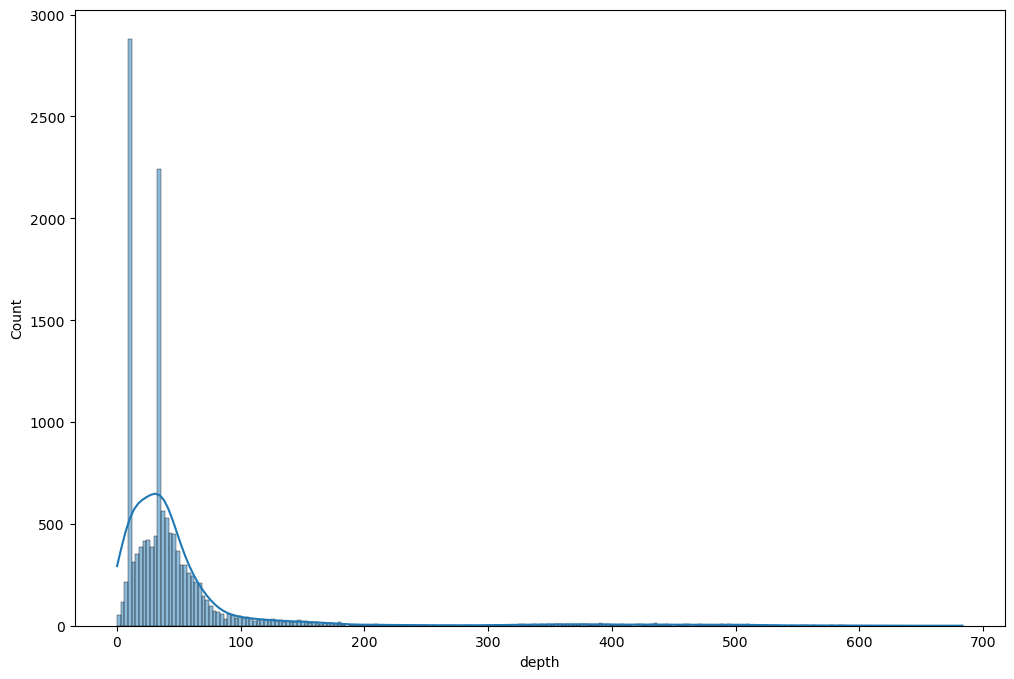

In [62]:
plt.figure(figsize=(12,8))
sns.histplot(x=df.depth,data=df,edgecolor='black', kde=True)

**Time series plot.**

In [24]:
y = df.magnitude
y = y.resample('D').median() 

In [25]:
y

time
2001-01-02 00:00:00+00:00    4.90
2001-01-03 00:00:00+00:00    5.25
2001-01-04 00:00:00+00:00    5.30
2001-01-05 00:00:00+00:00     NaN
2001-01-06 00:00:00+00:00    4.65
                             ... 
2018-11-23 00:00:00+00:00    4.95
2018-11-24 00:00:00+00:00     NaN
2018-11-25 00:00:00+00:00    4.60
2018-11-26 00:00:00+00:00    4.60
2018-11-27 00:00:00+00:00    4.90
Freq: D, Name: magnitude, Length: 6539, dtype: float64

In [26]:
y = y.fillna(y.mean())

In [27]:
y

time
2001-01-02 00:00:00+00:00    4.900000
2001-01-03 00:00:00+00:00    5.250000
2001-01-04 00:00:00+00:00    5.300000
2001-01-05 00:00:00+00:00    4.775622
2001-01-06 00:00:00+00:00    4.650000
                               ...   
2018-11-23 00:00:00+00:00    4.950000
2018-11-24 00:00:00+00:00    4.775622
2018-11-25 00:00:00+00:00    4.600000
2018-11-26 00:00:00+00:00    4.600000
2018-11-27 00:00:00+00:00    4.900000
Freq: D, Name: magnitude, Length: 6539, dtype: float64

Text(0.5, 1.0, 'Earthquakes on different months')

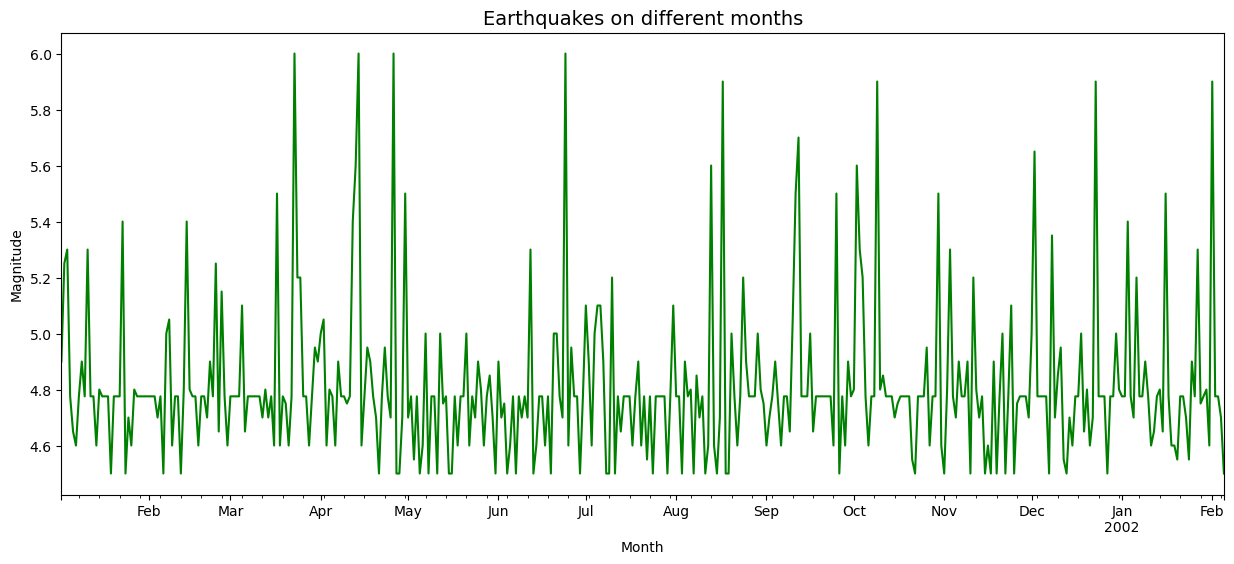

In [28]:
plt.figure(figsize=(15,6))
x = y[:400].plot(color='green')
x.set(xlabel='Month', ylabel='Magnitude')
x.set_title('Earthquakes on different months', fontsize=14)

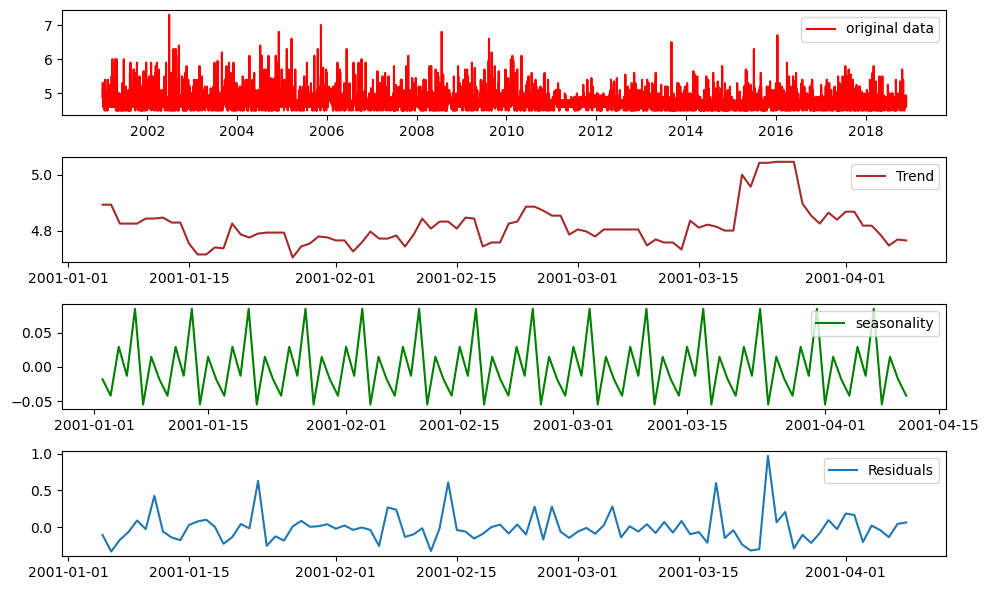

In [30]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition= seasonal_decompose(y[:100])

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(y, label = 'original data', color='red')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color='brown')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonality', color='green')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

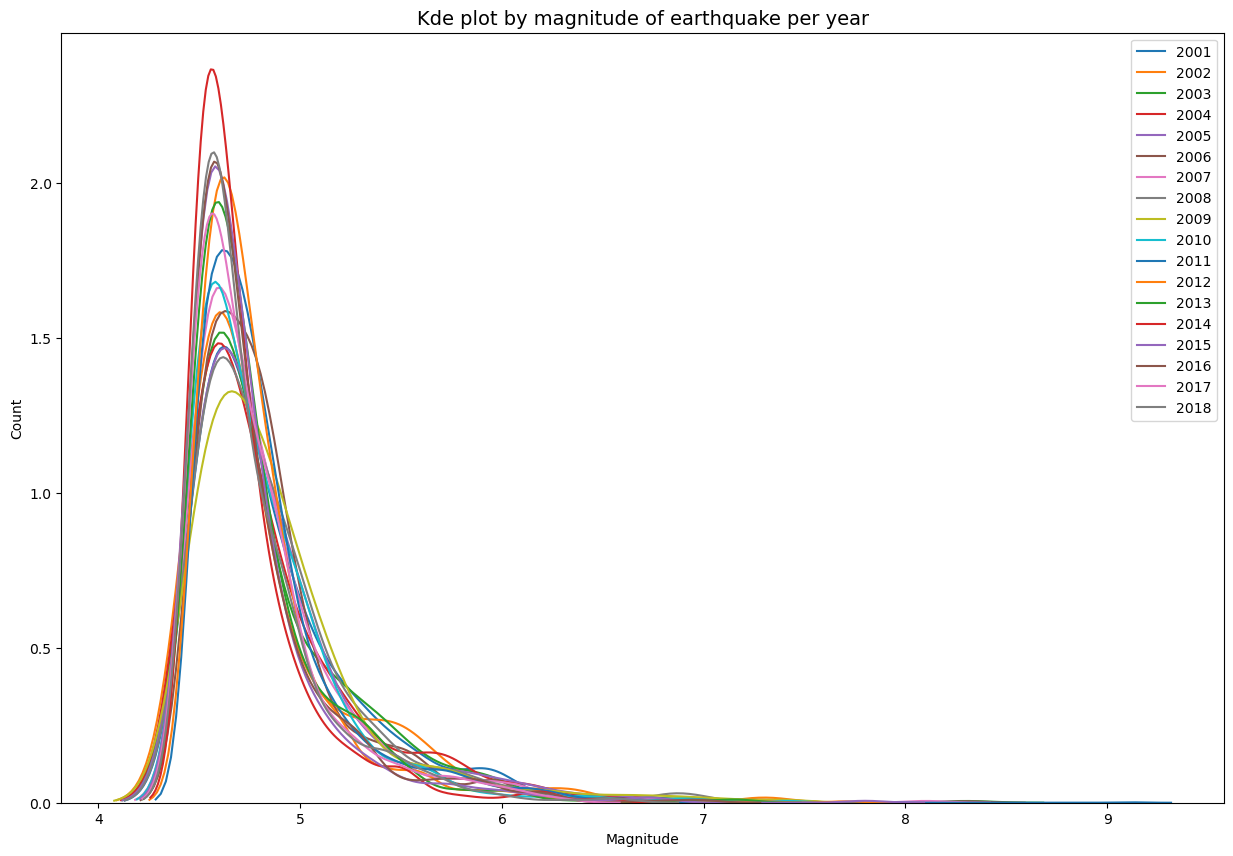

In [31]:
plt.figure(figsize=(15,10))
for i in range(2001,2019):
    val = pd.DataFrame(df[df['year']==i]['magnitude'])
    sns.kdeplot(val.magnitude)
    
plt.legend(["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"])
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Kde plot by magnitude of earthquake per year", fontsize=14)
plt.show()

**Let's visualize the locations on three different years, 2016, 2017 and 2018.**

In [29]:
z = df[df['year'].isin([2018,2017,2016])]
z.groupby('year').size()

year
2016    770
2017    522
2018    564
dtype: int64

In [30]:
m_2 =  folium.Map(location=[37.4900318, 136.4664008], tiles='Stamen Terrain', zoom_start=5)
def color_(value):
    if value==2018:
        return 'red'
    elif value==2017:
        return 'cyan'
    else:
        return 'purple'
    
for idx, row in z.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        popup=row['place'],
        color=color_(row['year']),
    ).add_to(m_2)
m_2
# m_2.save("index.html")

<img src="1.png" width="700" height="400">

**Visualizing the occurrences of earthquake from 2001 till 2018.**

In [31]:
m_3 = folium.Map(location=[37.4900318, 136.4664008], tiles='Stamen Terrain', zoom_start=5)

# Add points to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color="red",
        fill_color="red",
    ).add_to(m_3)
m_3
# m_3.save("index2.html")

<img src="2.png" width="700" height="400">